In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./Dataset/Outlier.csv')
df.sample(5)

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
524,524,524,49.0,Female,58079,47.0,London,2
2774,2774,2774,27.0,Female,192689,NaN,Tokyo,2
4625,4625,4625,NaN,Male,61025,8.0,Tokyo,1
2333,2333,2333,NaN,Male,86808,7.0,Tokyo,2
992,992,992,15.0,Female,20114,37.0,Tokyo,2


In [30]:
upper_limit = df['income'].quantile(0.99)
lower_limit = df['income'].quantile(0.01)
print(upper_limit)
print(lower_limit)

255072.0086
1077.9992


In [32]:
new_df = df[(df['income'] <= upper_limit) & (df['income'] >= lower_limit)]
new_df

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895.0,14.0,San Francisco,0
1,1,1,NaN,Male,161474.0,14.0,Tokyo,0
2,2,2,24.0,Male,104723.0,34.0,London,1
3,3,3,29.0,Male,43791.0,28.0,London,2
4,4,4,18.0,Female,132181.0,26.0,London,2
...,...,...,...,...,...,...,...,...
4995,4995,4995,NaN,Female,212261.0,28.0,San Francisco,1
4996,4996,4996,NaN,Male,70228.0,12.0,San Francisco,0
4997,4997,4997,NaN,Male,64995.0,14.0,New York City,0
4998,4998,4998,NaN,Male,56144.0,4.0,New York City,2


<Axes: xlabel='income', ylabel='Count'>

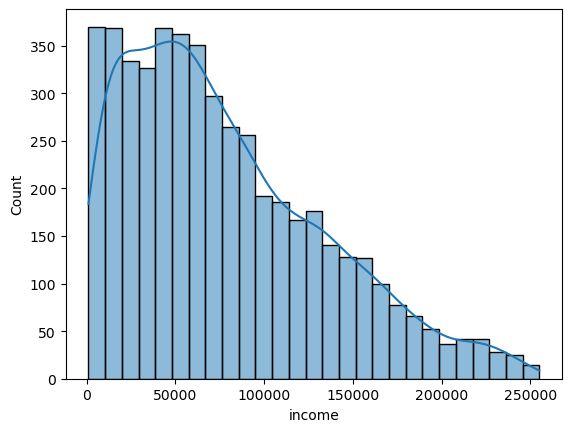

In [34]:
sns.histplot(new_df['income'], kde = True)

<Axes: ylabel='income'>

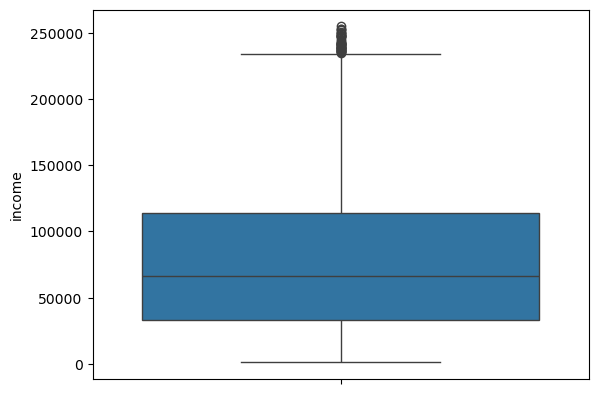

In [36]:
sns.boxplot(new_df['income'])

In [38]:
df['income'] = np.where(df['income'] >= upper_limit,
        upper_limit,
        np.where(df['income'] <= lower_limit,
        lower_limit,
        df['income']))

<Axes: xlabel='income', ylabel='Count'>

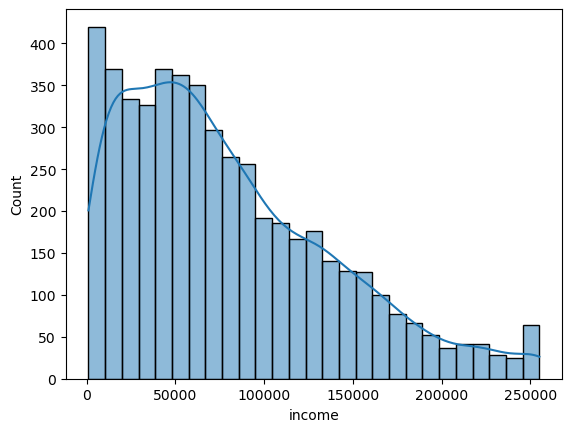

In [40]:
sns.histplot(df['income'], kde = True)

<Axes: ylabel='income'>

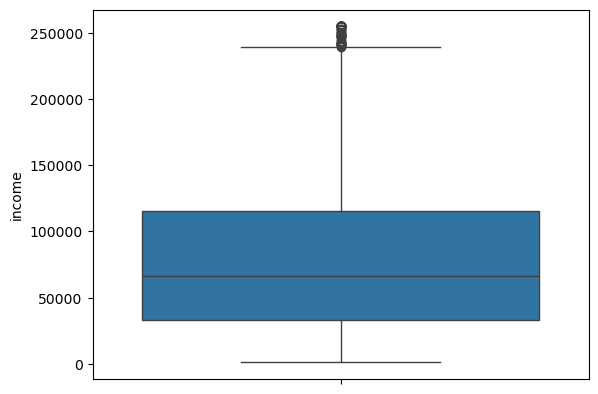

In [42]:
sns.boxplot(df['income'])